In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\Chenna Kesava\Data Analytics\Databases\New_Databases\Misc\Airlines+Airports+Cancellation+Codes+&+Flights\flights.csv')
df_airlines = pd.read_csv(r'D:\Chenna Kesava\Data Analytics\Databases\New_Databases\Misc\Airlines+Airports+Cancellation+Codes+&+Flights\airlines.csv')
df_airports = pd.read_csv(r'D:\Chenna Kesava\Data Analytics\Databases\New_Databases\Misc\Airlines+Airports+Cancellation+Codes+&+Flights\airports.csv')
df_cancellation = pd.read_csv(r'D:\Chenna Kesava\Data Analytics\Databases\New_Databases\Misc\Airlines+Airports+Cancellation+Codes+&+Flights\cancellation_codes.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_44768\226097216.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Chenna Kesava\Data Analytics\Databases\New_Databases\Misc\Airlines+Airports+Cancellation+Codes+&+Flights\flights.csv')


In [5]:
df_original_cleaned = df.copy()

In [7]:
summary = pd.DataFrame({
    'null_count': df_original_cleaned.isna().sum(),
    'empty_string_count': (df_original_cleaned == '').sum(),
    'zero_count': (df_original_cleaned == 0).sum(),
    'null_count_percentage': df_original_cleaned.isna().mean() * 100
}) 

summary

,null_count,empty_string_count,zero_count,null_count_percentage
YEAR,0,0,0,0.000000
MONTH,0,0,0,0.000000
DAY,0,0,0,0.000000
DAY_OF_WEEK,0,0,0,0.000000
AIRLINE,0,0,0,0.000000
FLIGHT_NUMBER,0,0,0,0.000000
TAIL_NUMBER,14721,0,0,0.252978
ORIGIN_AIRPORT,0,0,0,0.000000
DESTINATION_AIRPORT,0,0,0,0.000000
SCHEDULED_DEPARTURE,0,0,0,0.000000


In [8]:
departure_on_time_pct = (
    (df_original_cleaned["DEPARTURE_DELAY"] <= 0).sum()
    / df_original_cleaned["DEPARTURE_DELAY"].notna().sum()
) * 100
departure_on_time_pct = round(departure_on_time_pct, 2)


In [9]:
arrival_on_time_pct = (
    (df_original_cleaned["ARRIVAL_DELAY"] <= 0).sum()
    / df_original_cleaned["ARRIVAL_DELAY"].notna().sum()
) * 100

In [10]:
df_median_arr_delay = df_original_cleaned['ARRIVAL_DELAY'].median()

In [11]:
df_median_dep_delay = df_original_cleaned['DEPARTURE_DELAY'].median()

In [12]:
kpi = pd.DataFrame({
    "KPI": ["On-Time Departure :", " On-Time-Arrival :", "Median Arrival Delay :", "Median Departure Delay :"],
    "Value": [f"{departure_on_time_pct:.2f}%", f"{arrival_on_time_pct:.2f}%", f"{df_median_arr_delay} secs", f"{df_median_dep_delay} secs"]
})
kpi


,KPI,Value
0,On-Time Departure :,62.92%
1,On-Time-Arrival :,63.48%
2,Median Arrival Delay :,-5.0 secs
3,Median Departure Delay :,-2.0 secs


In [13]:
df_original_cleaned["date"] = pd.to_datetime(
    dict(year=df_original_cleaned["YEAR"], month=df_original_cleaned["MONTH"], day=df_original_cleaned["DAY"])
)
df_original_cleaned["MONTH_NAME"] = df_original_cleaned["date"].dt.month_name()



In [14]:
def extract_hour(hhmm):
    if pd.isna(hhmm):
        return None
    hhmm = int(hhmm)
    if hhmm == 2400:
        return 0
    return hhmm // 100
df_original_cleaned['DEPARTURE_HOUR'] = df_original_cleaned['SCHEDULED_DEPARTURE'].apply(extract_hour)
df_original_cleaned['ARRIVAL_HOUR'] = df_original_cleaned['SCHEDULED_ARRIVAL'].apply(extract_hour)
df_original_cleaned

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,date,MONTH_NAME,DEPARTURE_HOUR,ARRIVAL_HOUR
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,4
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,7
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,8
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,8
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31,December,23,8
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31,December,23,4
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31,December,23,4
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31,December,23,3


In [15]:
median_departure_delay = df_original_cleaned.groupby('DEPARTURE_HOUR')['DEPARTURE_DELAY'].median()

In [16]:
median_arrival_delay = df_original_cleaned.groupby('ARRIVAL_HOUR')['ARRIVAL_DELAY'].median()

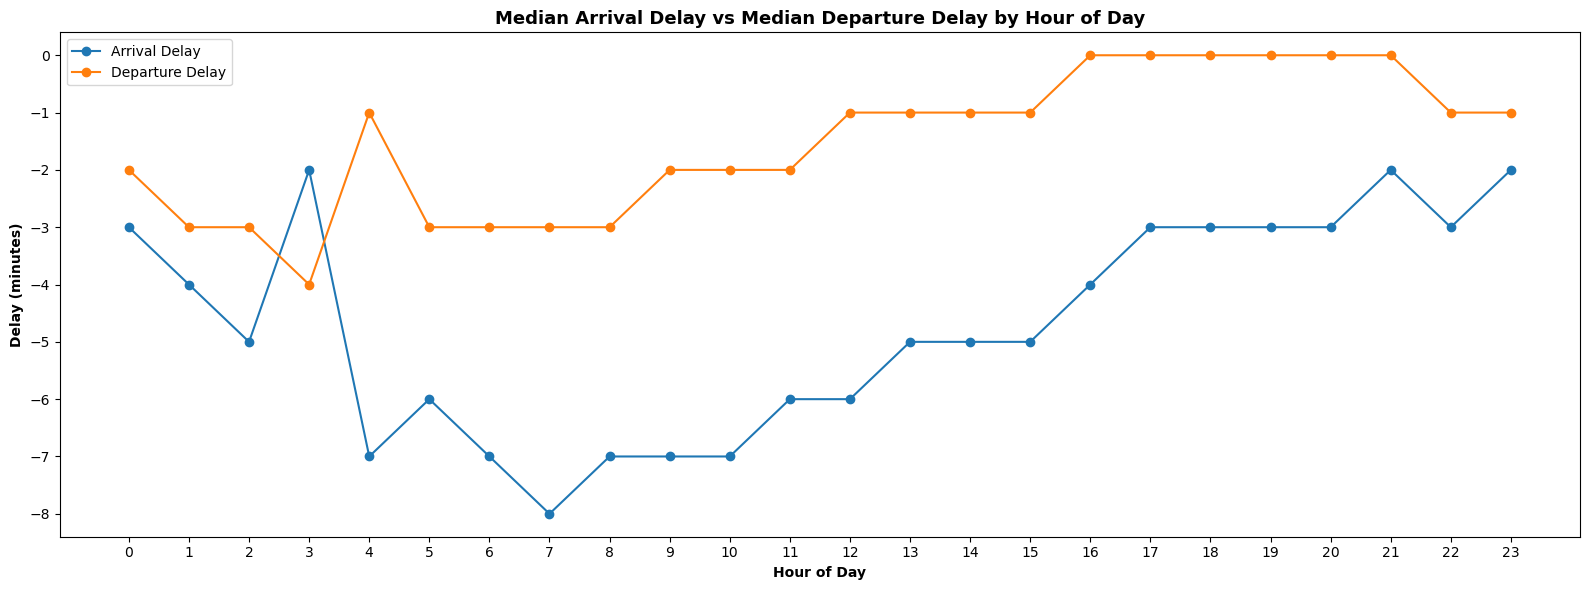

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.clear
ax.plot(
    median_arrival_delay.index,
    median_arrival_delay.values,
    marker='o',
    label='Arrival Delay'
)
ax.plot(
    median_departure_delay.index,
    median_departure_delay.values,
    marker='o',
    label='Departure Delay'
)
ax.set_title('Median Arrival Delay vs Median Departure Delay by Hour of Day', fontsize=13, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=10, fontweight='bold')
ax.set_ylabel('Delay (minutes)', fontsize=10, fontweight='bold')
ax.set_xticks(range(24))
ax.legend()
plt.tight_layout()
plt.show()


In [18]:
month_departure_delay = df_original_cleaned.groupby('MONTH_NAME')['DEPARTURE_DELAY'].median().reset_index(name='MONTHLY_DEPARTURE_DELAY').sort_values('MONTH_NAME')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

month_departure_delay['MONTH_NAME'] = pd.Categorical(
    month_departure_delay['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

month_departure_delay = month_departure_delay.sort_values('MONTH_NAME')


In [19]:
month_arrival_delay = df_original_cleaned.groupby('MONTH_NAME')['ARRIVAL_DELAY'].median().reset_index(name='MONTHLY_ARRIVAL_DELAY').sort_values('MONTH_NAME')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

month_arrival_delay['MONTH_NAME'] = pd.Categorical(
    month_arrival_delay['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

month_arrival_delay = month_arrival_delay.sort_values('MONTH_NAME')

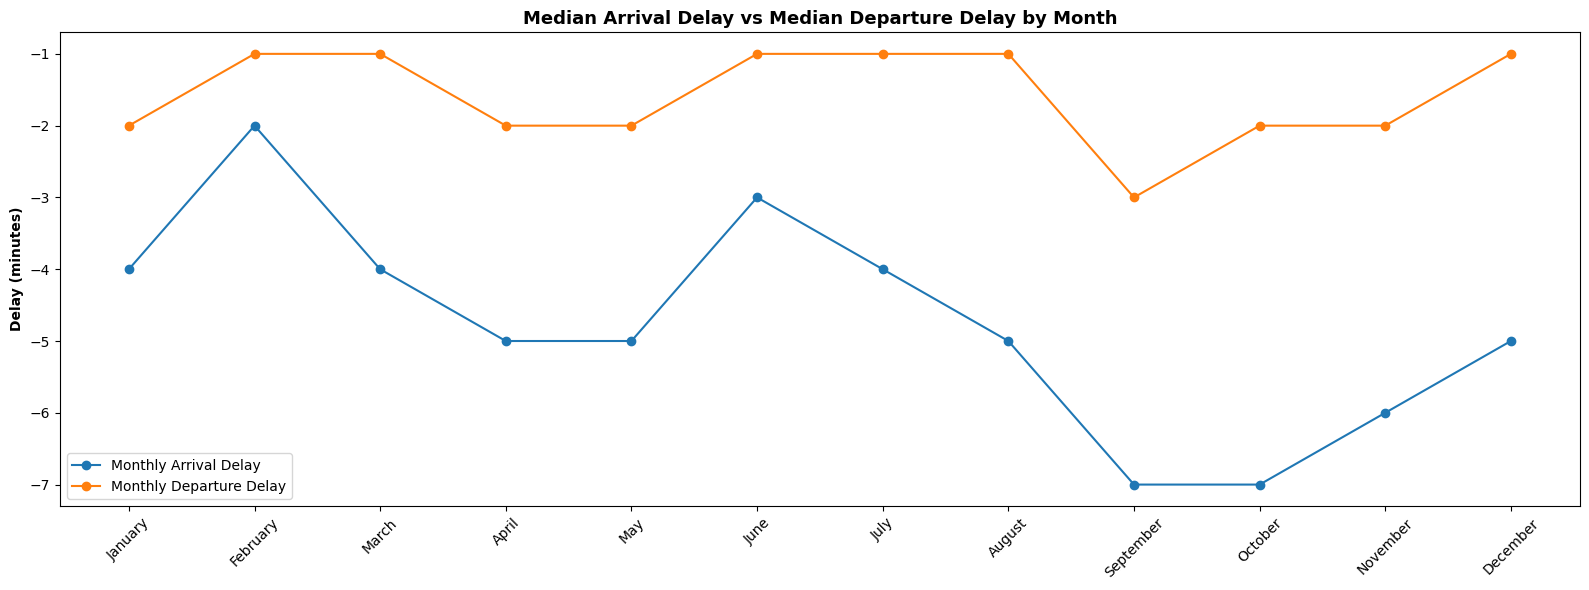

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(
    month_arrival_delay['MONTH_NAME'],
    month_arrival_delay['MONTHLY_ARRIVAL_DELAY'],
    marker='o',
    label='Monthly Arrival Delay'
)

ax.plot(
    month_departure_delay['MONTH_NAME'],
    month_departure_delay['MONTHLY_DEPARTURE_DELAY'],
    marker='o',
    label='Monthly Departure Delay'
)

ax.set_title('Median Arrival Delay vs Median Departure Delay by Month', fontsize=13, fontweight='bold')
ax.set_ylabel('Delay (minutes)', fontsize=10, fontweight='bold')

ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
df_combined = (
    df_original_cleaned
    .merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    .merge(df_airports.add_prefix('ORIGIN_'), left_on='ORIGIN_AIRPORT', right_on='ORIGIN_IATA_CODE', how='left')
    .merge(df_airports.add_prefix('DEST_'), left_on='DESTINATION_AIRPORT', right_on='DEST_IATA_CODE', how='left')
    .merge(df_cancellation, left_on='CANCELLATION_REASON', right_on='CANCELLATION_REASON', how='left')
)

In [22]:
df_combined.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_x,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_IATA_CODE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE,CANCELLATION_DESCRIPTION
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,NaN


In [23]:
df_arrdelay_airline = df_combined.groupby('AIRLINE_y')['ARRIVAL_DELAY'].median().sort_values(ascending=True).head(8)

In [24]:
df_depdelay_airline = df_combined.groupby('AIRLINE_y')['DEPARTURE_DELAY'].median().sort_values(ascending=True).head(8)

In [25]:
df_avg_taxiout = df_combined.groupby('ORIGIN_AIRPORT_y')['TAXI_OUT'].median().sort_values(ascending=False).head(10)

In [26]:
df_avg_taxiin = df_combined.groupby('DEST_AIRPORT')['TAXI_IN'].median().sort_values(ascending=False).head(10)

In [27]:
df_avg_depdelay = df_combined.groupby('ORIGIN_AIRPORT_y')['DEPARTURE_DELAY'].median().sort_values(ascending=False).head(10)

In [28]:
df_avg_arrdelay = df_combined.groupby('DEST_AIRPORT')['ARRIVAL_DELAY'].median().sort_values(ascending=False).head(10)

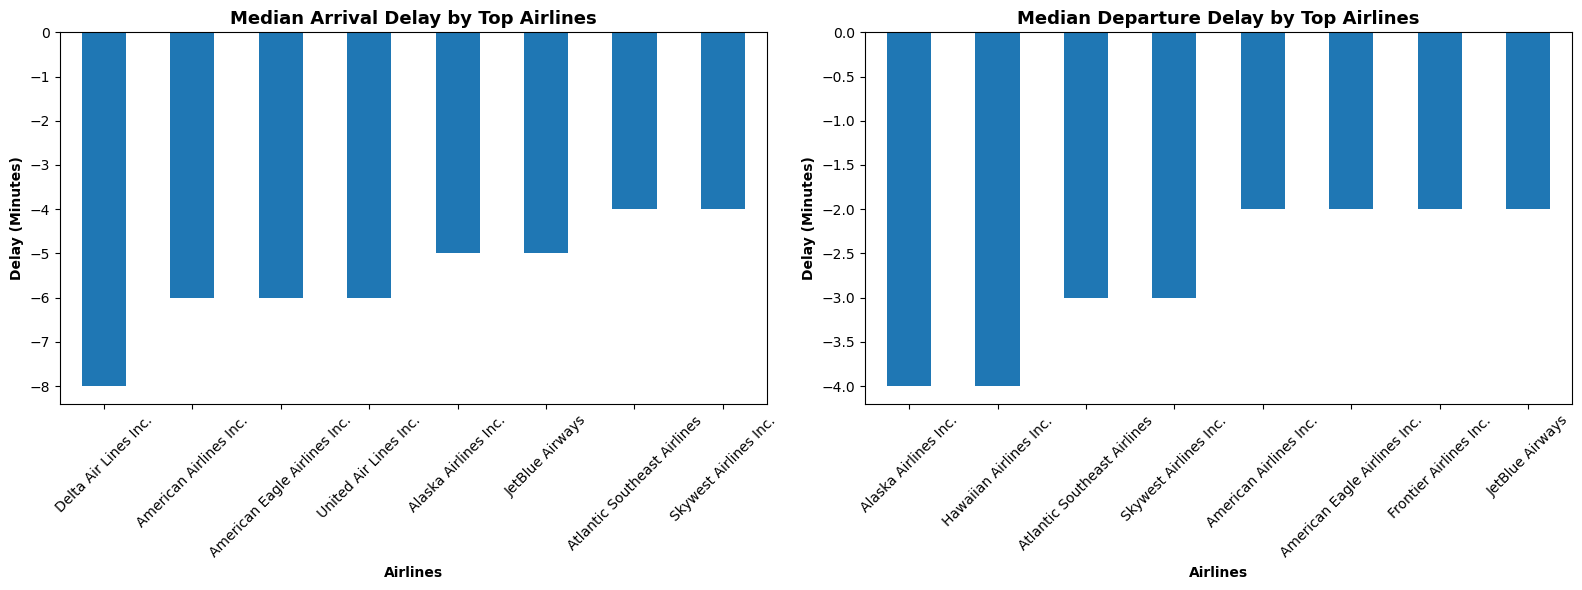

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df_arrdelay_airline.plot(
    kind='bar', ax=axes[0]
)
axes[0].set_title('Median Arrival Delay by Top Airlines', fontsize = 13, fontweight='bold')
axes[0].set_ylabel('Delay (Minutes)', fontsize=10, fontweight='bold')
axes[0].set_xlabel('Airlines', fontsize=10, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
df_depdelay_airline.plot(
    kind='bar', ax=axes[1]
)
axes[1].set_title('Median Departure Delay by Top Airlines', fontsize = 13, fontweight='bold')
axes[1].set_ylabel('Delay (Minutes)', fontsize = 10, fontweight='bold')
axes[1].set_xlabel('Airlines', fontsize = 10, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

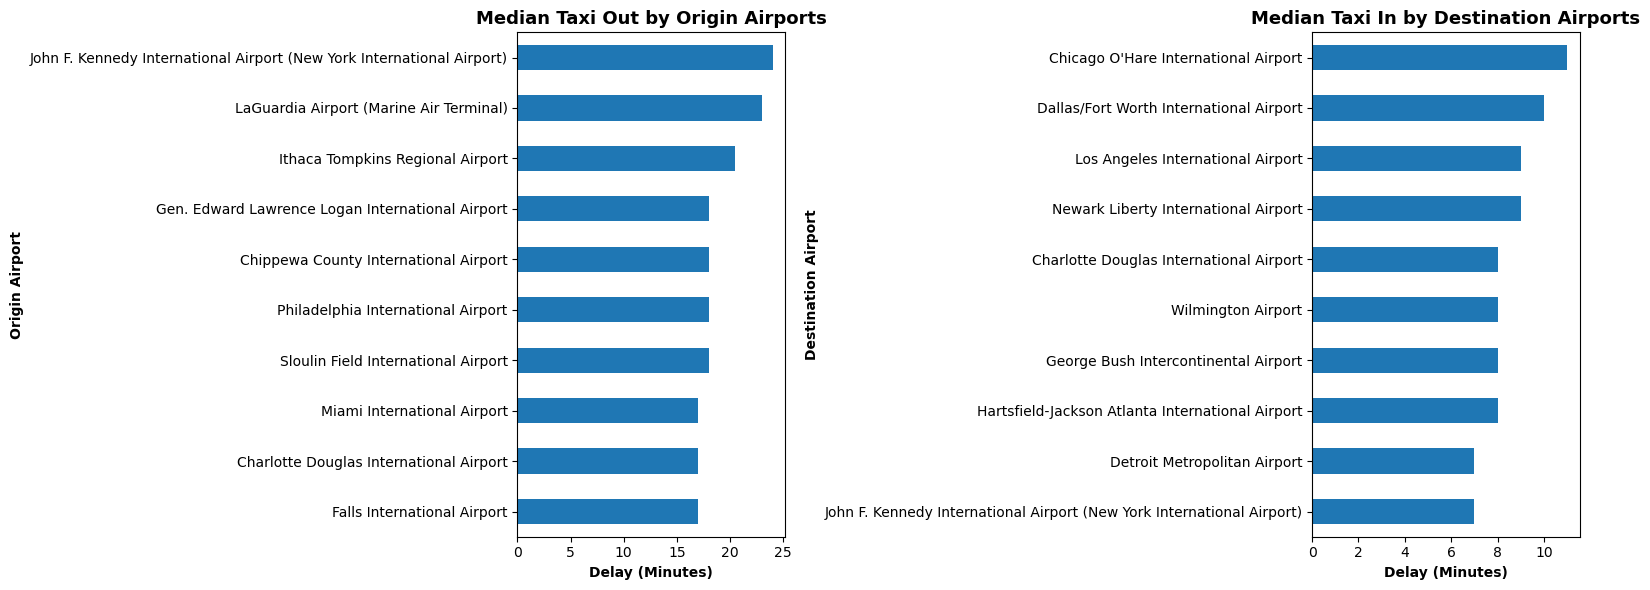

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df_avg_taxiout.sort_values().plot(
    kind='barh', ax=axes[0]
)
axes[0].set_title('Median Taxi Out by Origin Airports', fontsize = 13, fontweight='bold')
axes[0].set_ylabel('Origin Airport', fontsize=10, fontweight='bold')
axes[0].set_xlabel('Delay (Minutes)', fontsize=10, fontweight='bold')
df_avg_taxiin.sort_values().plot(
    kind='barh', ax=axes[1]
)
axes[1].set_title('Median Taxi In by Destination Airports', fontsize = 13, fontweight='bold')
axes[1].set_ylabel('Destination Airport', fontsize = 10, fontweight='bold')
axes[1].set_xlabel('Delay (Minutes)', fontsize = 10, fontweight='bold')
plt.tight_layout()
plt.show()

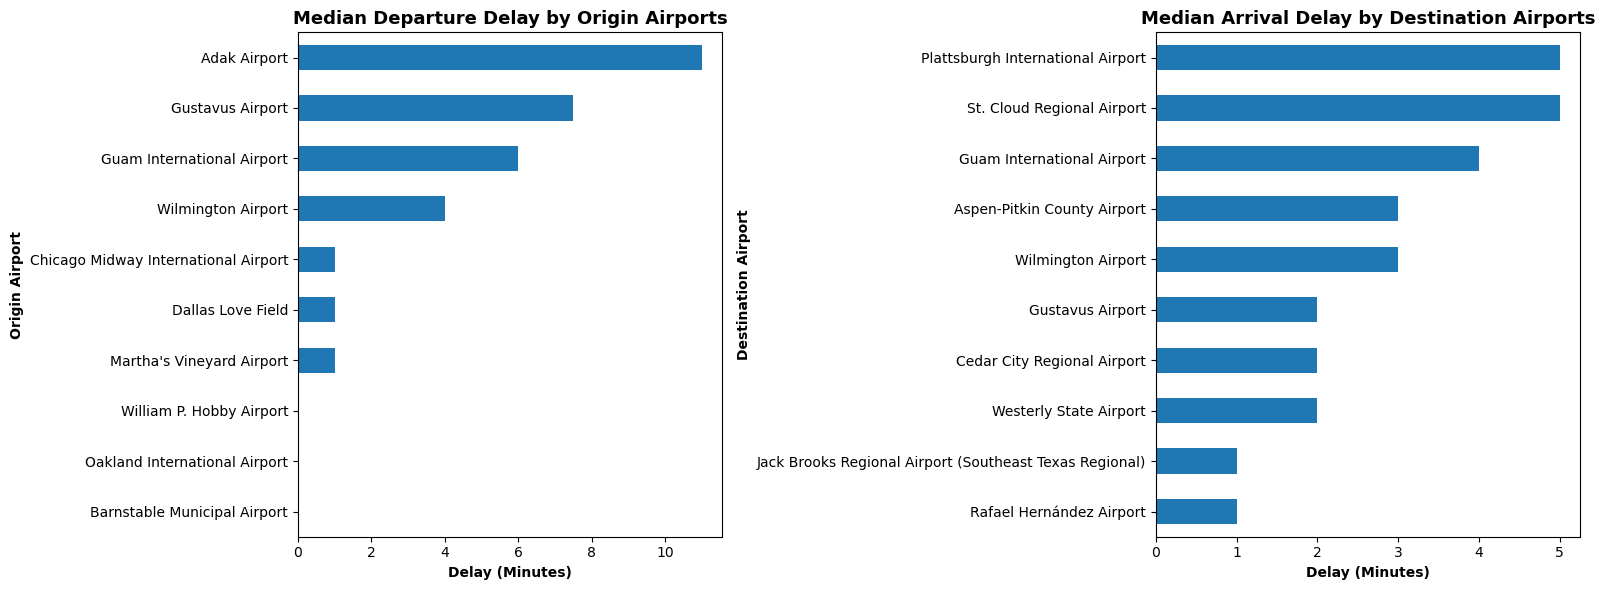

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df_avg_depdelay.sort_values().plot(
    kind='barh', ax=axes[0]
)
axes[0].set_title('Median Departure Delay by Origin Airports', fontsize = 13, fontweight='bold')
axes[0].set_ylabel('Origin Airport', fontsize=10, fontweight='bold')
axes[0].set_xlabel('Delay (Minutes)', fontsize=10, fontweight='bold')
df_avg_arrdelay.sort_values().plot(
    kind='barh', ax=axes[1]
)
axes[1].set_title('Median Arrival Delay by Destination Airports', fontsize = 13, fontweight='bold')
axes[1].set_ylabel('Destination Airport', fontsize = 10, fontweight='bold')
axes[1].set_xlabel('Delay (Minutes)', fontsize = 10, fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
flights_per_month = (df_combined.groupby('MONTH_NAME').size().reset_index(name='TOTAL_FLIGHTS'))

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

flights_per_month['MONTH_NAME'] = pd.Categorical(
    flights_per_month['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

flights_per_month = flights_per_month.sort_values('MONTH_NAME')


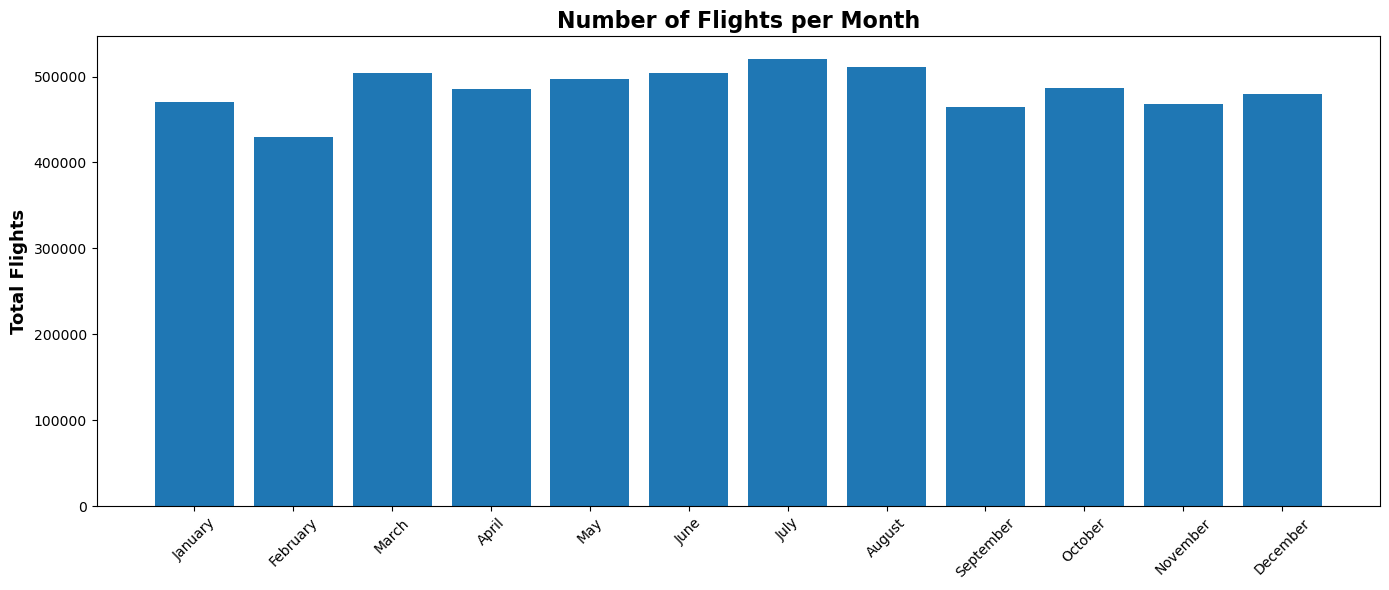

In [33]:
plt.figure(figsize=(14,6))
plt.bar(
    flights_per_month['MONTH_NAME'],
    flights_per_month['TOTAL_FLIGHTS']
)
plt.xticks(rotation=45)
plt.title('Number of Flights per Month', fontsize = 16, fontweight = 'bold')
plt.ylabel('Total Flights', fontsize = 13, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [34]:
cancelled_flights_per_month = (df_combined[df_combined['CANCELLED'] == 1].groupby('MONTH_NAME').size().reset_index(name='CANCELLED_FLIGHTS'))

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

cancelled_flights_per_month['MONTH_NAME'] = pd.Categorical(
    cancelled_flights_per_month['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

cancelled_flights_per_month = cancelled_flights_per_month.sort_values('MONTH_NAME')


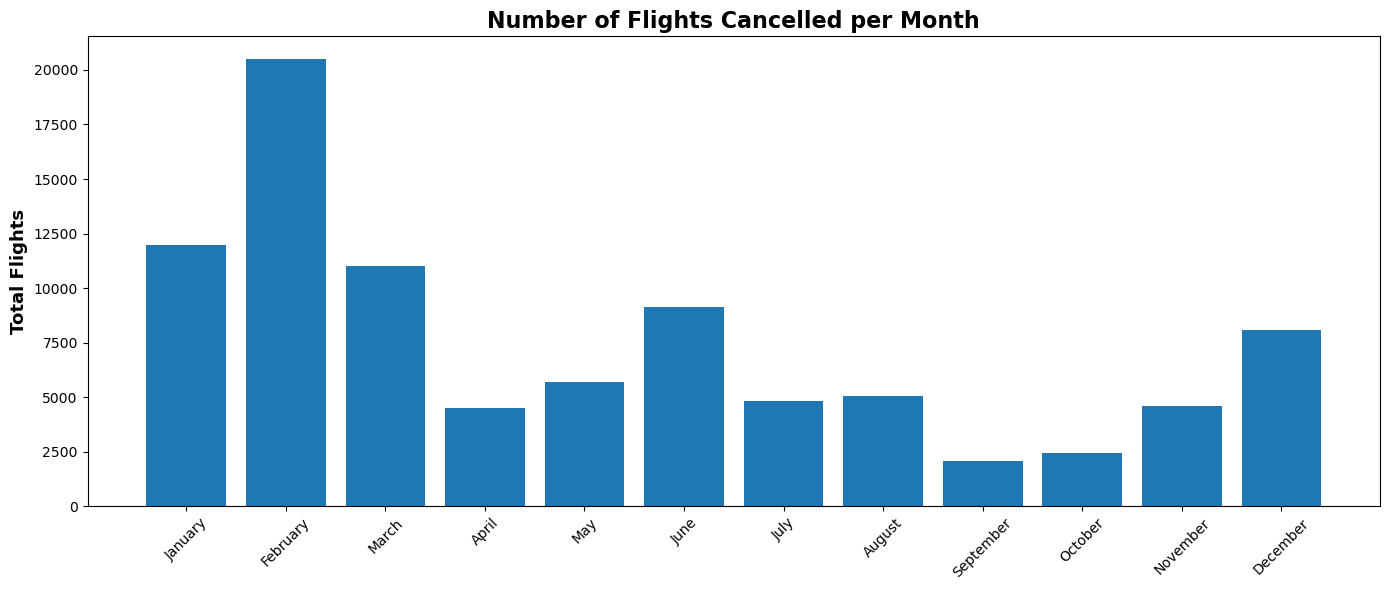

In [35]:
plt.figure(figsize=(14,6))
plt.bar(
    cancelled_flights_per_month['MONTH_NAME'],
    cancelled_flights_per_month['CANCELLED_FLIGHTS']
)
plt.xticks(rotation=45)
plt.title('Number of Flights Cancelled per Month', fontsize = 16, fontweight = 'bold')
plt.ylabel('Total Flights', fontsize = 13, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [36]:
pd.set_option('display.max_columns', None)
df_combined.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_x,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,date,MONTH_NAME,DEPARTURE_HOUR,ARRIVAL_HOUR,IATA_CODE,AIRLINE_y,ORIGIN_IATA_CODE,ORIGIN_AIRPORT_y,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_IATA_CODE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE,CANCELLATION_DESCRIPTION
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,4,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,7,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,8,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,8,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,January,0,3,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,NaN


In [37]:

df_combined['ROUTE'] = (df_combined['ORIGIN_CITY'] + ' --> ' + df_combined['DEST_CITY'])

route_traffic = df_combined.groupby(['ROUTE']).size().reset_index(name='Total Flights').sort_values('Total Flights', ascending=False).head(10)

In [38]:
cancelled_traffic = df_combined[df_combined['CANCELLED'] == 1].groupby(['ROUTE']).size().reset_index(name='Cancelled_Flights').sort_values('Cancelled_Flights', ascending=False).head(10)

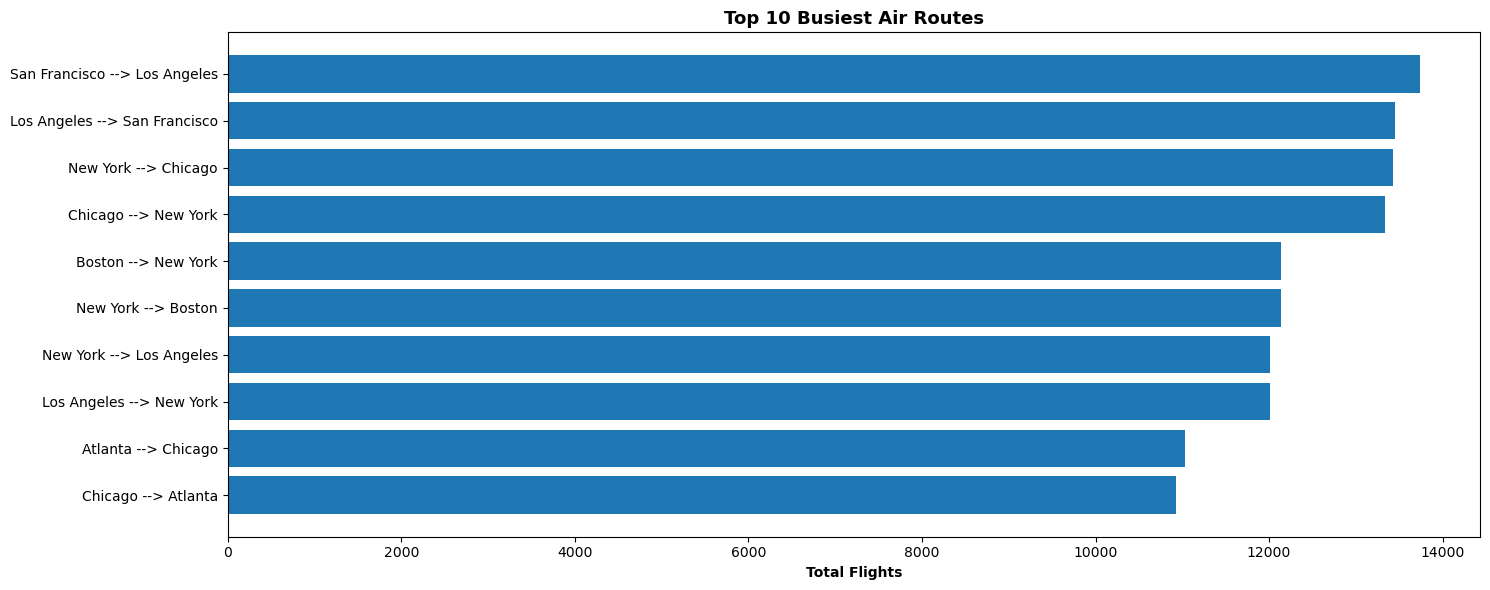

In [39]:
plt.figure(figsize=(15,6))
plt.barh(
    route_traffic['ROUTE'],
    route_traffic['Total Flights']
)
plt.gca().invert_yaxis()
plt.title('Top 10 Busiest Air Routes', fontsize=13, fontweight='bold')
plt.xlabel('Total Flights', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

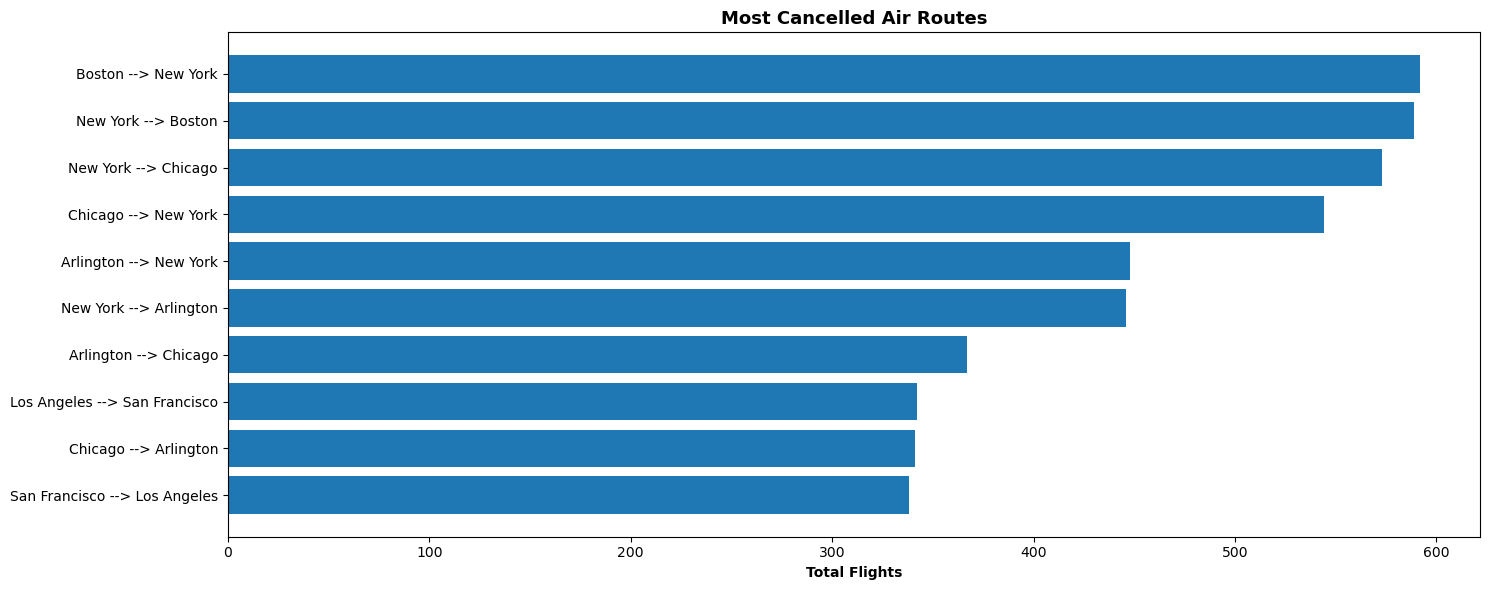

In [40]:
plt.figure(figsize=(15,6))
plt.barh(
    cancelled_traffic['ROUTE'],
    cancelled_traffic['Cancelled_Flights']
)
plt.gca().invert_yaxis()
plt.title('Most Cancelled Air Routes', fontsize=13, fontweight='bold')
plt.xlabel('Total Flights', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [41]:
df_on_time = df_combined[df_combined['ARRIVAL_DELAY'] <= 0]
df_on_time_airline = df_on_time['AIRLINE_y'].value_counts().reset_index(name='Flights')

In [42]:
total_flights = len(df_combined)
on_time_flights = len(df_combined[df_combined['ARRIVAL_DELAY'] <= 0])
total_on_time_flights = (on_time_flights/total_flights)*100
total_on_time_flights

62.331375807065

In [43]:
on_time_percentage_airline = (
    (df_combined['ARRIVAL_DELAY'] <= 0)
    .groupby(df_combined['AIRLINE_y'])
    .mean()
    .mul(100)
    .reset_index(name='ON_TIME_PERCENTAGE')
    .sort_values(by='ON_TIME_PERCENTAGE', ascending=False)
)


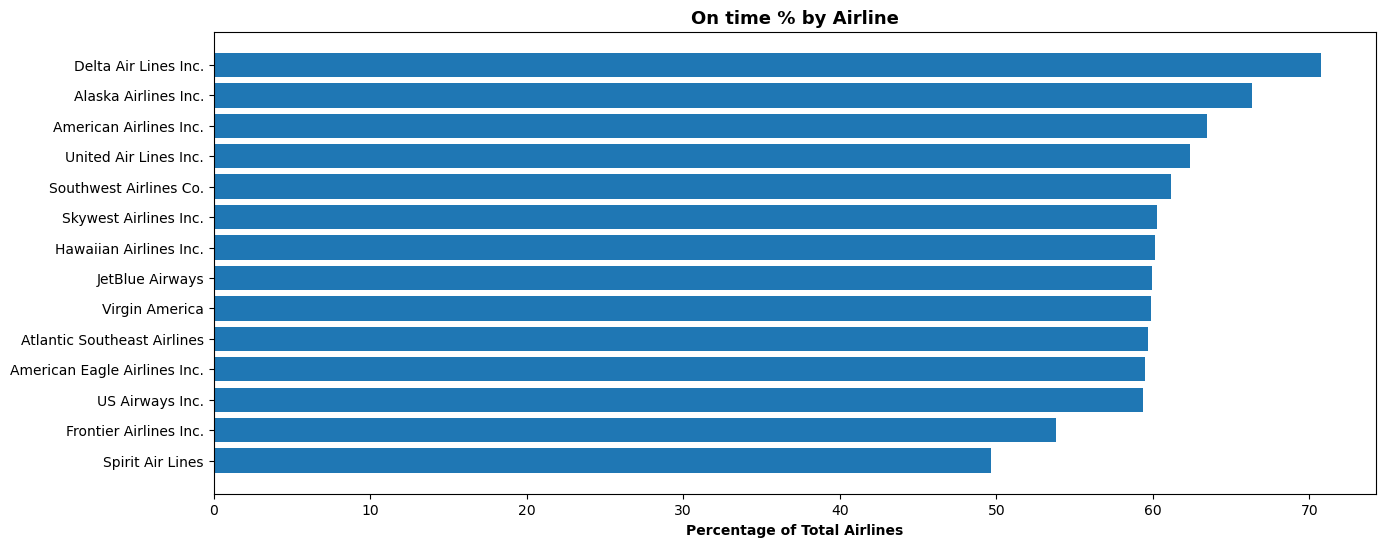

In [44]:
plt.figure(figsize=(15,6))
plt.barh(
    on_time_percentage_airline['AIRLINE_y'],
    on_time_percentage_airline['ON_TIME_PERCENTAGE']
)
plt.gca().invert_yaxis()
plt.title('On time % by Airline', fontsize=13, fontweight='bold')
plt.xlabel('Percentage of Total Airlines', fontsize=10, fontweight='bold')
plt.tight_layout
plt.show()


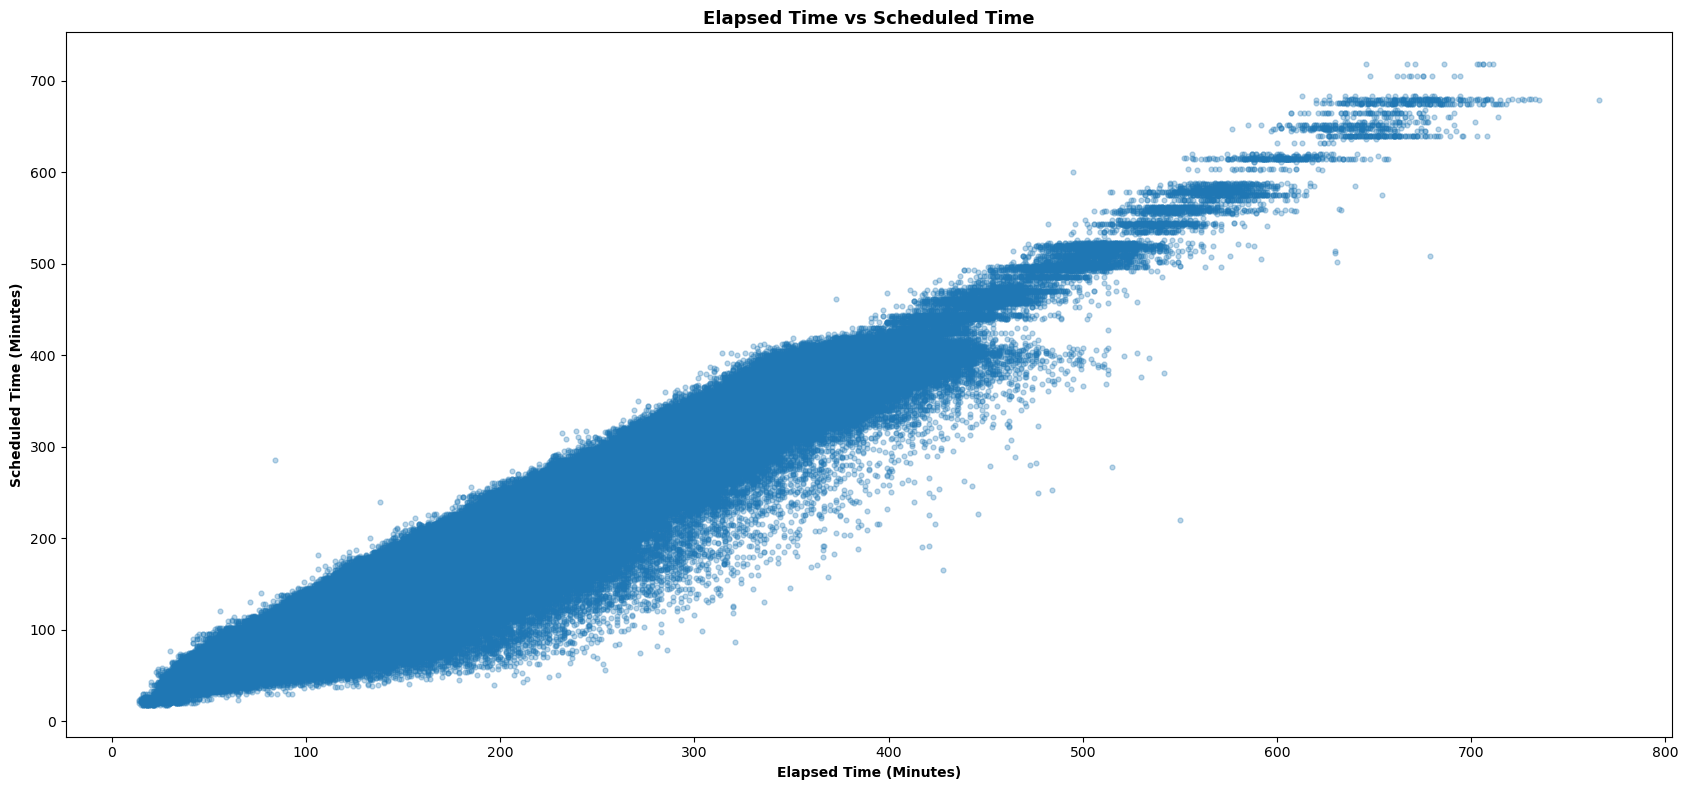

In [45]:
plt.figure(figsize=(17,8))
plt.scatter(
    df_combined['ELAPSED_TIME'],
    df_combined['SCHEDULED_TIME'],
    alpha=0.3,
    s=12
)
plt.title('Elapsed Time vs Scheduled Time', fontsize=13, fontweight='bold')
plt.xlabel('Elapsed Time (Minutes)',fontsize=10, fontweight='bold')
plt.ylabel('Scheduled Time (Minutes)', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

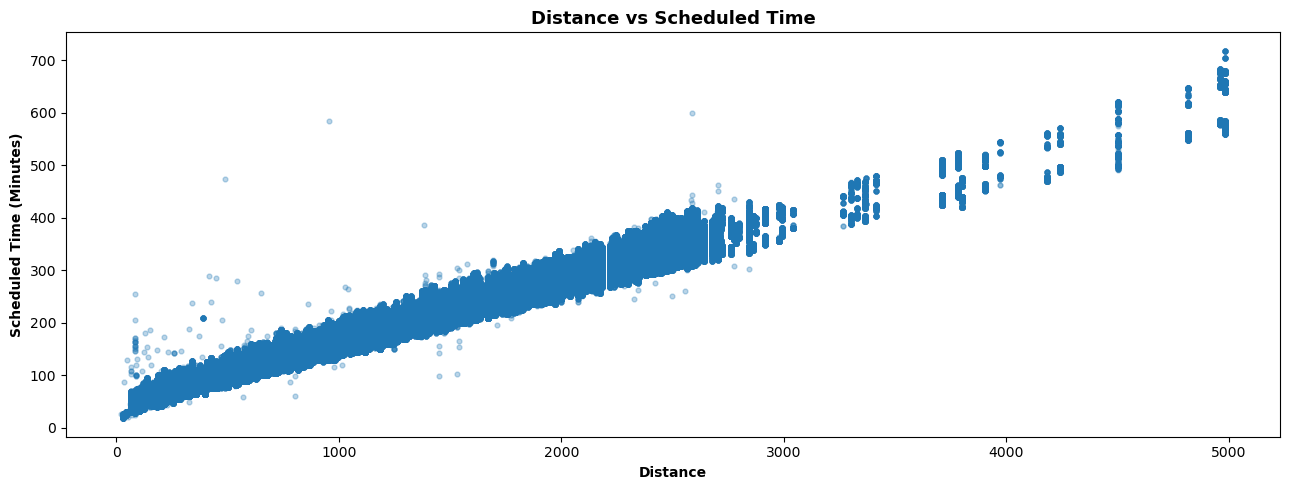

In [46]:
plt.figure(figsize=(13,5))
plt.scatter(
    df_combined['DISTANCE'],
    df_combined['SCHEDULED_TIME'],
    alpha=0.3,
    s=12
)
plt.title('Distance vs Scheduled Time', fontsize=13, fontweight='bold')
plt.xlabel('Distance',fontsize=10, fontweight='bold')
plt.ylabel('Scheduled Time (Minutes)', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [49]:
df_combined['YEAR'] = pd.to_numeric(df_combined['YEAR'], errors='coerce')
df_combined['MONTH'] = pd.to_numeric(df_combined['MONTH'], errors='coerce')
df_combined['DAY'] = pd.to_numeric(df_combined['DAY'], errors='coerce')

df_combined['date'] = pd.to_datetime(
    dict(
        year=df_combined['YEAR'],
        month=df_combined['MONTH'],
        day=df_combined['DAY']
    ),
    errors='coerce'
)
df_combined['MONTH_NAME'] = df_combined['date'].dt.month_name()
def extract_hour(hhmm):
    if pd.isna(hhmm):
        return None
    hhmm = int(hhmm)
    if hhmm == 2400:
        return 0
    return hhmm // 100

df_combined['DEPARTURE_HOUR'] = df_combined['SCHEDULED_DEPARTURE'].apply(extract_hour)
df_combined['ARRIVAL_HOUR'] = df_combined['SCHEDULED_ARRIVAL'].apply(extract_hour)

In [51]:
df_cancelled_hour = (df_combined[df_combined['CANCELLED']==1].groupby('DEPARTURE_HOUR').size().reset_index(name='CANCELLED FLIGHTS'))

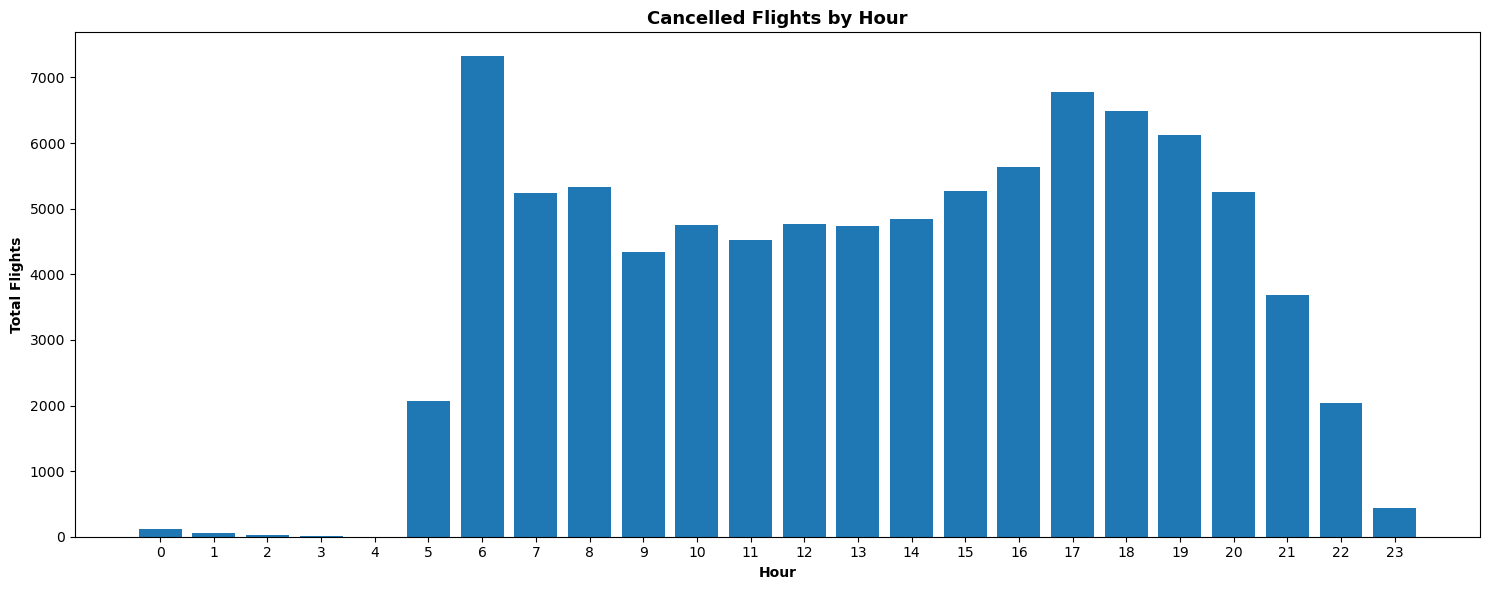

In [52]:
plt.figure(figsize=(15,6))
plt.bar(
    df_cancelled_hour['DEPARTURE_HOUR'],
    df_cancelled_hour['CANCELLED FLIGHTS']
)
plt.title('Cancelled Flights by Hour', fontsize=13, fontweight='bold')
plt.ylabel('Total Flights', fontsize=10, fontweight='bold')
plt.xlabel('Hour', fontsize=10, fontweight='bold')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [53]:
df_cancelled_airline = df_combined[df_combined['CANCELLED'] == 1].groupby('ORIGIN_AIRPORT_y').size().sort_values(ascending=False).reset_index(name='Flights').head(10)

In [54]:
df_cancelled_airlines = df_combined[df_combined['CANCELLED'] == 1].groupby('AIRLINE_y').size().sort_values(ascending=False).reset_index(name='Flights').head(10)

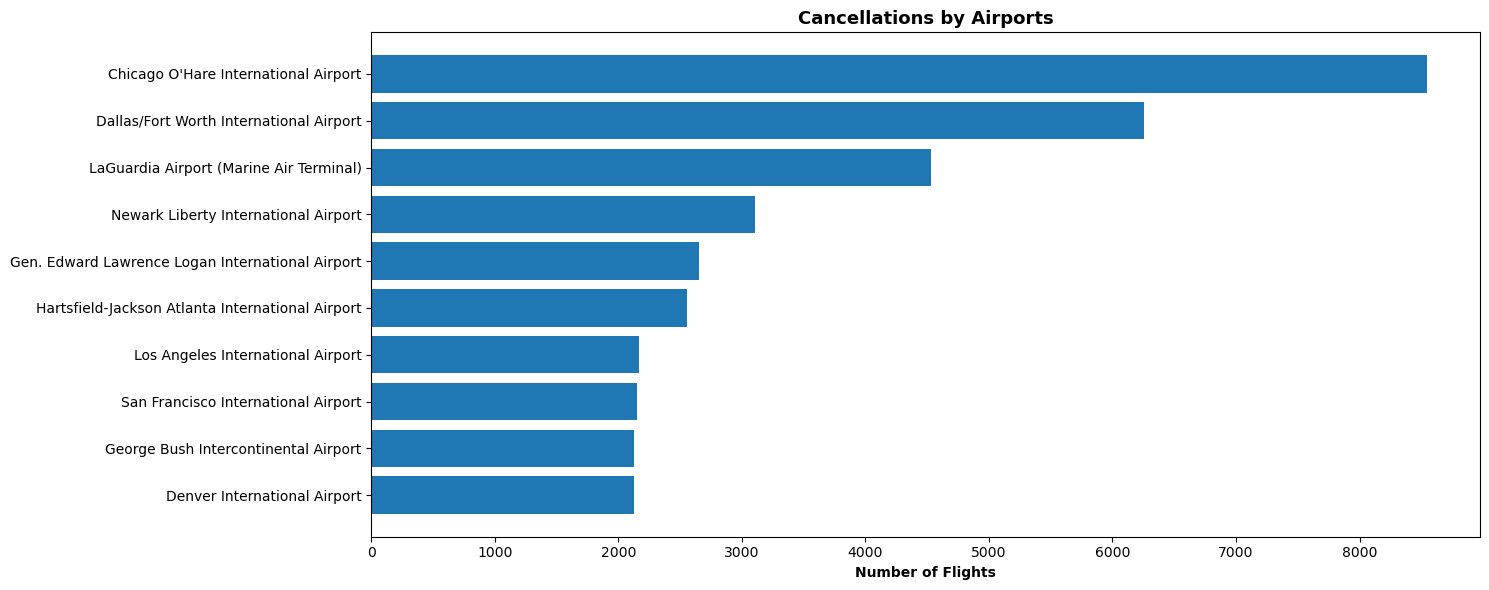

In [55]:
plt.figure(figsize=(15,6))
plt.barh(
    df_cancelled_airline['ORIGIN_AIRPORT_y'],
    df_cancelled_airline['Flights']
)
plt.gca().invert_yaxis()
plt.title('Cancellations by Airports', fontsize=13, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

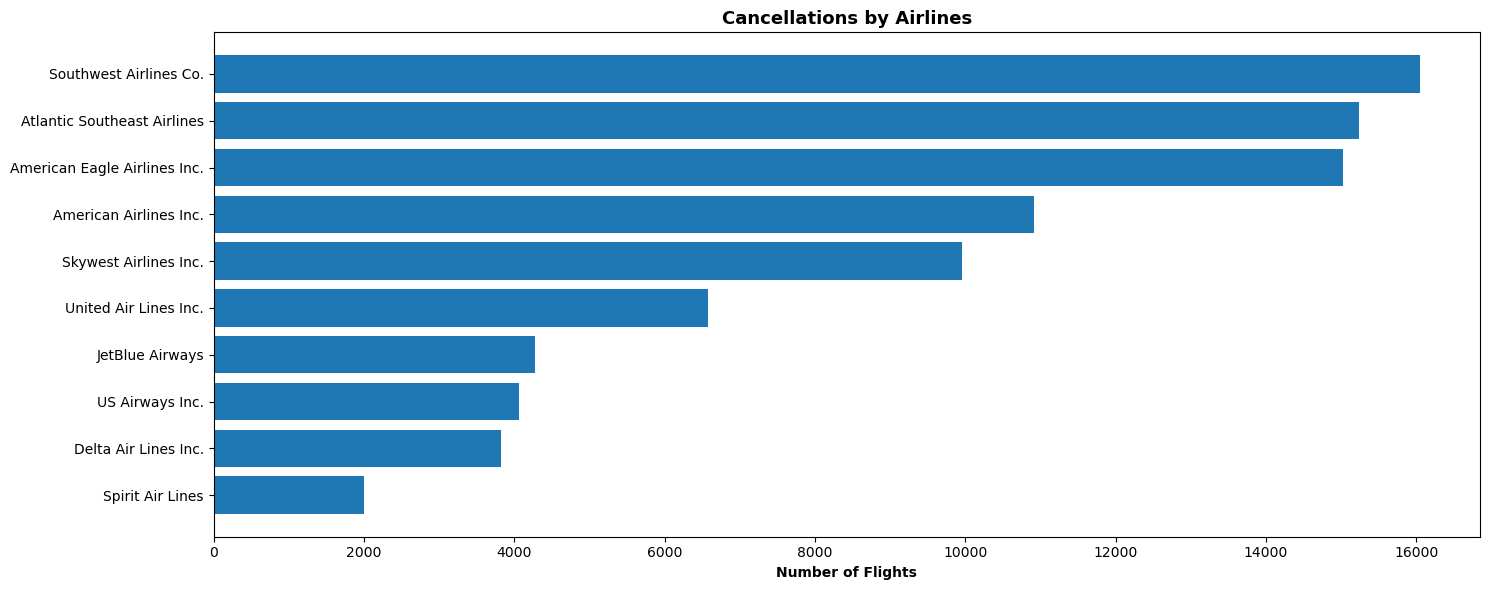

In [56]:
plt.figure(figsize=(15,6))
plt.barh(
    df_cancelled_airlines['AIRLINE_y'],
    df_cancelled_airlines['Flights']
)
plt.gca().invert_yaxis()
plt.title('Cancellations by Airlines', fontsize=13, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [57]:
df_cancelled_reason = df_combined[df_combined['CANCELLED'] == 1].groupby('CANCELLATION_DESCRIPTION').size().sort_values(ascending=False).reset_index(name='Flights')

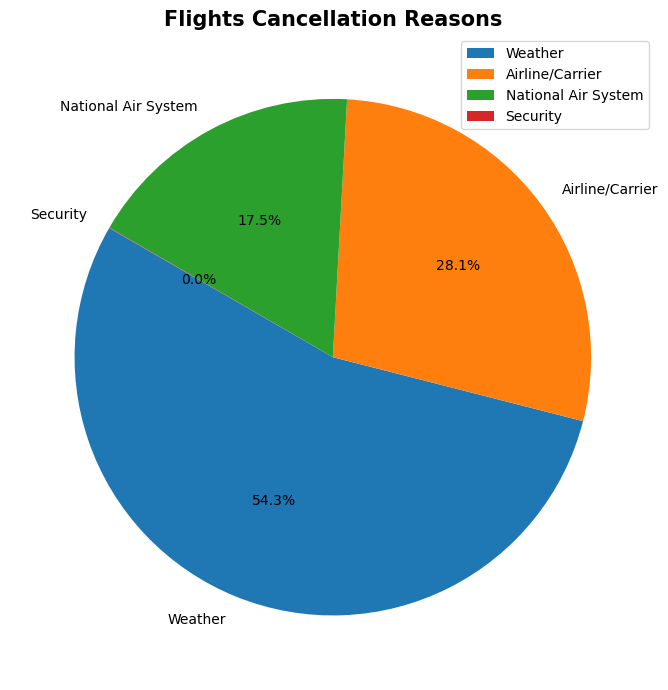

In [58]:
plt.figure(figsize=(12,7))
plt.pie(
    df_cancelled_reason['Flights'],
    labels=df_cancelled_reason['CANCELLATION_DESCRIPTION'],
    autopct='%1.1f%%',
    startangle=150
)
plt.title('Flights Cancellation Reasons', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.legend()
plt.show()